# python 일반

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## IPython 매직커맨드

|커맨드|설명|
|---|---|
|%conda|	콘다 명령어. %conda install 으로 라이버르러 추가 가능|
|%magic|	매직 커맨드 설명 출력|
|%hist|	명령어 입력 히스토리 출력|
|%reset|	이전에 입력된 변수를 삭제|
|%del| <변수명>	변수를 삭제|
|%run|	지정된 스크립트를 실행|
|%time| <명령어>	명령어 실행 시간을 출력|
|%timeit| <명령어>	명령어를 여러번 실행후 평균 실행 시간을 출력|

### matplotlib 매직 커맨드

|커맨드|설명|
|---|---|
|%matplotlib|matplotlib으로 그린 그래프를 출력|
|%matplotlib|inline	주피터에서 그래프를 출력|


In [5]:
# %magic time

## Kaggle

### Titanic 생존자 예측

#### 데이터분석

In [6]:
train = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### 결측치 확인

In [7]:
# 데이터 프레임의 null 값의 개수를 세어 줌 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 분석용 차트 생성 함수

In [8]:
def show_pie_chart(df, col_name):
    colname_survived = survived_crosstab(train, col_name)
    pie_chart(colname_survived)
    return colname_survived

def survived_crosstab(df, col_name):
    '''col_name과 Survived간의 교차도표 생성'''
    feature_survived = pd.crosstab(df[col_name], df['Survived'])
    feature_survived.columns = feature_survived.columns.map({0:"Dead", 1:"Alive"})
    return feature_survived

def pie_chart(feature_survived):
    '''
    pie_chart 생성
    pcol, prow = 차트를 출력할 개수. pcol * prow 만큼의 차트 출력 
    '''
    frows, fcols = feature_survived.shape
    pcol = 3
    prow = (frows/pcol + frows%pcol)
    plot_height = prow * 2.5
    plt.figure(figsize=(8, plot_height))

    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)

        index_name = feature_survived.index[row]
        plt.pie(feature_survived.loc[index_name], labels=feature_survived.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{0}' survived".format(index_name))

    plt.show()

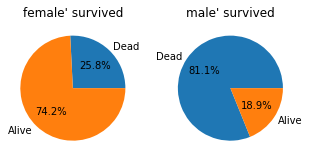

Survived,Dead,Alive
Sex,,
female,81,233
male,468,109


In [10]:
show_pie_chart(train, 'Sex')


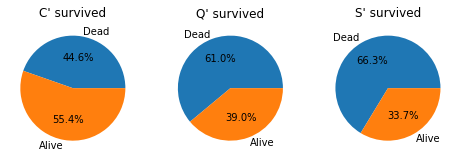

Survived,Dead,Alive
Embarked,,
C,75,93
Q,47,30
S,427,217


In [11]:
show_pie_chart(train, 'Embarked')

In [12]:
# 호칭 추출 
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.')
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

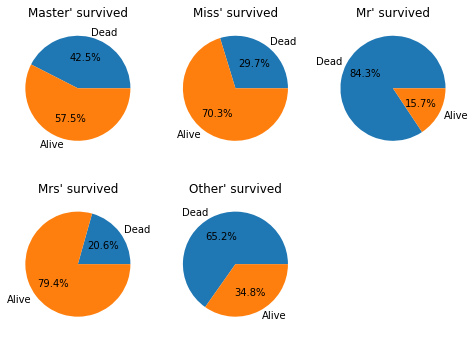

Survived,Dead,Alive
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Other,15,8


In [13]:
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].replace('Ms', 'Miss')   
train['Title'].value_counts()

c = show_pie_chart(train, 'Title')
c

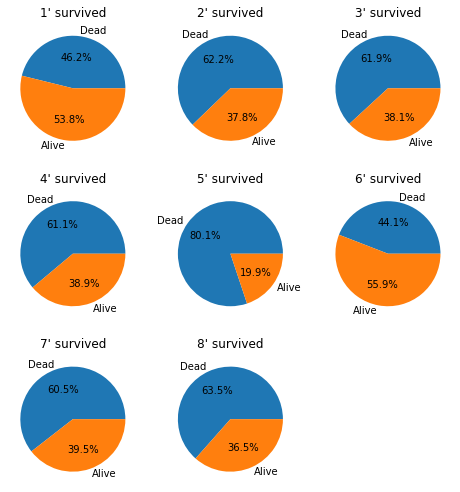

Survived,Dead,Alive
AgeCategory,,
1,54,63
2,79,48
3,60,37
4,66,42
5,125,31
6,30,38
7,69,45
8,66,38


In [14]:
meanAge = train[['Title', 'Age']].groupby(['Title']).mean()
for index, row in meanAge.iterrows():
    nullIndex = train[(train.Title == index) & (train.Age.isnull())].index
    train.loc[nullIndex, 'Age'] = row[0]

train['AgeCategory'] = pd.qcut(train.Age, 8, labels=range(1, 9))
train.AgeCategory = train.AgeCategory.astype(int)

c = show_pie_chart(train, 'AgeCategory')
c

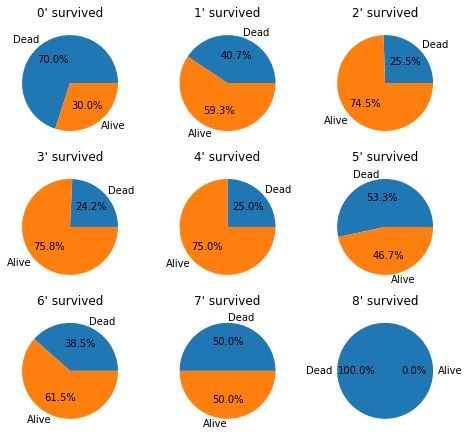

Survived,Dead,Alive
CabinCategory,,
0,481,206
1,24,35
2,12,35
3,8,25
4,8,24
5,8,7
6,5,8
7,2,2
8,1,0


In [15]:
train.Cabin.fillna('N', inplace=True)
train["CabinCategory"] = train["Cabin"].str.slice(start=0, stop=1)  
train["CabinCategory"] = train['CabinCategory'].map({ "N": 0, "C": 1, "B": 2, "D": 3, "E": 4, "A": 5, "F": 6, "G": 7, "T": 8 })

c = show_pie_chart(train, 'CabinCategory')
c

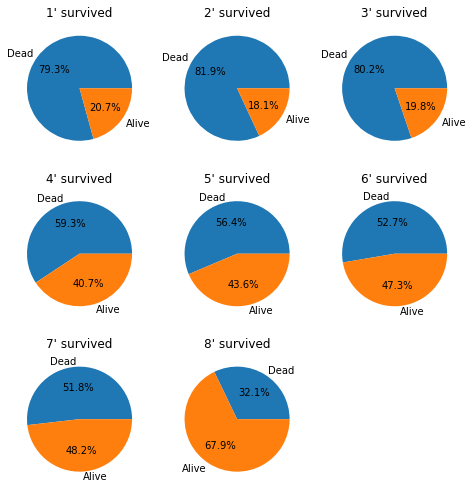

Survived,Dead,Alive
FareCategory,,
1,111,29
2,68,15
3,89,22
4,67,46
5,62,48
6,59,53
7,57,53
8,36,76


In [16]:
train.Fare.fillna(0) # test.csv 데이터에 결측치가 존재함.
train['FareCategory'] = pd.qcut(train.Fare, 8, labels=range(1, 9))
train.FareCategory = train.FareCategory.astype(int)

c = show_pie_chart(train, 'FareCategory')
c

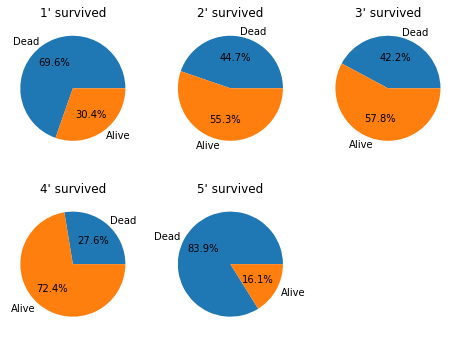

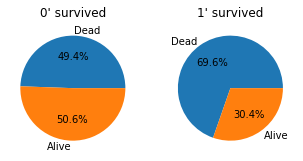

Survived,Dead,Alive
IsAlone,,
0,175,179
1,374,163


In [17]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
train.loc[train["Family"] > 4, "Family"] = 5

train['IsAlone'] = 1
train.loc[train['Family'] > 1, 'IsAlone'] = 0


c = show_pie_chart(train, 'Family')
c

c = show_pie_chart(train, 'IsAlone')
c

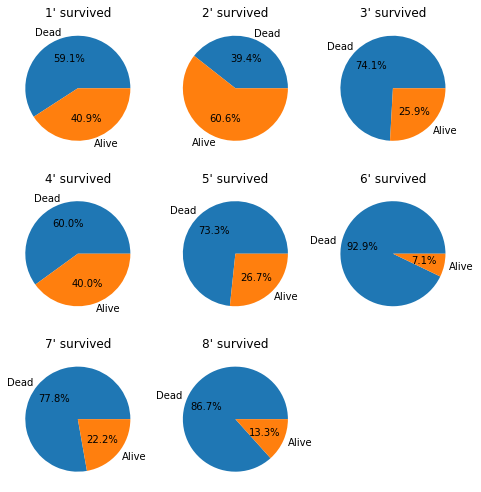

Survived,Dead,Alive
TicketCategory,,
1,136,94
2,91,140
3,272,95
4,6,4
5,11,4
6,13,1
7,7,2
8,13,2


In [18]:
# STON/O2. 3101282를 ['STON/O2.', '3101282']로 변경하고, '3101282'의 첫 번째 3을 선택 
train['TicketCategory'] = train.Ticket.str.split() # 공백으로 분리 
train['TicketCategory'] = [i[-1][0] for i in train['TicketCategory']] # 
train['TicketCategory'] = train['TicketCategory'].replace(['8', '9', 'L'], '8')
train['TicketCategory'] = pd.factorize(train['TicketCategory'])[0] + 1

c = show_pie_chart(train, 'TicketCategory')
c

#### 전처리

<table>
<thead>
<tr>
<th>기존 칼럼</th>
<th>신규 칼럼</th>
<th>설명</th>
</tr>
</thead>
<tbody>
<tr>
<td>Sex</td>
<td>Sex</td>
<td>성별. female -&gt; 0, male -&gt; 1로 변환</td>
</tr>
<tr>
<td>Embarked</td>
<td>Embarked</td>
<td>탑승항. C -&gt; 0, Q -&gt; 1, S -&gt; 2로 변환</td>
</tr>
<tr>
<td>Name</td>
<td>Title</td>
<td>이름에서 호칭을 추출. Master -&gt; 0, Miss -&gt; 1, Mr -&gt; 2, Mrs -&gt; 3, Other -&gt; 4로 변환</td>
</tr>
<tr>
<td>Age</td>
<td>AgeCategory</td>
<td>나이를 <code>qcut</code>으로 8개의 구간으로 분리하여 카테고리화. 결측치는 호칭의 평균값으로 채움</td>
</tr>
<tr>
<td>Cabin</td>
<td>CabinCategory</td>
<td>방번호를 첫 글자만 따서 카테고리화. 결측치는 N으로 채움</td>
</tr>
<tr>
<td>Fare</td>
<td>FareCategory</td>
<td>운임을 8개의 구간으로 분리하여 카테고리화. 결측치는 0으로 채움</td>
</tr>
<tr>
<td>SibSp, Parch</td>
<td>Family, IsAlone</td>
<td>가족으로 합침. 혼자 탑승한 고객 정보 추출</td>
</tr>
<tr>
<td>Ticket</td>
<td>TicketCategory</td>
<td>티켓 번호의 첫 번째 번호만 추출하여 카테고리화</td>
</tr>
</tbody>
</table>

In [20]:
import pandas as pd

# train = pd.read_csv(r'titanic_train.csv')
# test = pd.read_csv(r'titanic_test.csv')
train = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/test.csv")

def feature_engineering(df):
    # Sex
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

    # Embarked
    df.Embarked.fillna('S', inplace=True)
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

    # Title
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.')
    df['Title'] = df['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs':3, 'Other':4})

    # Age
    meanAge = df[['Title', 'Age']].groupby(['Title']).mean()
    for index, row in meanAge.iterrows():
        nullIndex = df[(df.Title == index) & (df.Age.isnull())].index
        df.loc[nullIndex, 'Age'] = row[0]

    df['AgeCategory'] = pd.qcut(df.Age, 8, labels=range(1, 9))
    df.AgeCategory = df.AgeCategory.astype(int)

    # Cabin
    df.Cabin.fillna('N', inplace=True)
    df["CabinCategory"] = df["Cabin"].str.slice(start=0, stop=1)
    df["CabinCategory"] = df['CabinCategory'].map({ "N": 0, "C": 1, "B": 2, "D": 3, "E": 4, "A": 5, "F": 6, "G": 7, "T": 8 })

    # Fare
    df.Fare.fillna(0, inplace=True)
    df['FareCategory'] = pd.qcut(df.Fare, 8, labels=range(1, 9))
    df.FareCategory = df.FareCategory.astype(int)

    # SibSp, Parch
    df['Family'] = df['SibSp'] + df['Parch'] + 1
    df.loc[df["Family"] > 4, "Family"] = 5

    df['IsAlone'] = 1
    df.loc[df['Family'] > 1, 'IsAlone'] = 0

    # Ticket
    df['TicketCategory'] = df.Ticket.str.split()
    df['TicketCategory'] = [i[-1][0] for i in df['TicketCategory']]
    df['TicketCategory'] = df['TicketCategory'].replace(['8', '9', 'L'], '8')
    df['TicketCategory'] = pd.factorize(df['TicketCategory'])[0] + 1

    df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Name', 'Age', 'SibSp', 'Parch'], axis=1, inplace=True)

    return df

train = feature_engineering(train)
test = feature_engineering(test)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Survived        891 non-null    int64
 1   Pclass          891 non-null    int64
 2   Sex             891 non-null    int64
 3   Embarked        891 non-null    int64
 4   Title           891 non-null    int64
 5   AgeCategory     891 non-null    int64
 6   CabinCategory   891 non-null    int64
 7   FareCategory    891 non-null    int64
 8   Family          891 non-null    int64
 9   IsAlone         891 non-null    int64
 10  TicketCategory  891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Pclass          418 non-null    int64
 1   Sex             418 non-null    int64
 2   Embarked      

#### 머신러닝

# 데이터분석


## Pandas

## NumPy

## scikit-learn

## matplotlib